In [132]:
## all imports
from IPython.display import HTML
import chardet
import io
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import os
import urllib.request
from urllib.request import urlopen
from bs4 import BeautifulSoup
from time import sleep
import requests
import operator
import socket
import _pickle
import math
import re # regular expressions

from pandas import Series
import pandas as pd
from pandas import DataFrame

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
import json

import seaborn as sns
sns.set_context("talk")
sns.set_style("white")
import matplotlib.patches as mpatches

from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

import time
from datetime import datetime

import matplotlib.dates as mdates

#from secret import *

### START GRAPHING

In [133]:
if os.path.isfile("Master_File_File.csv"):
    filepath_master = "Master_File_File.csv"
    print ("Master_File_.csv loading from file")
    
else:
    filepath = "https://docs.google.com/spreadsheets/d/1pfiz1CjeaS36L5CZIGqcXByj9qGpxKztXcsQ8o-1rOQ/pub?output=csv"
    print ("afl.com.au loading from the internet")



Master_File_.csv loading from file


In [134]:
df= pd.read_csv(filepath_master)
print ("done")

done


### CREATE A BASE/UNMANIPULATED DF FOR LATER

In [373]:
df_base = df

In [135]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['font.size'] = (20)

### USEFUL LINKS

https://matplotlib.org/users/legend_guide.html

http://matplotlib.org/api/lines_api.html#matplotlib.lines.Line2D.set_markersize

https://matplotlib.org/users/colors.html

plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.1)
#plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=2, mode="expand", borderaxespad=0.)

https://github.com/tomwyb/code1161base/blob/master/.ipynb_checkpoints/aircon-checkpoint.ipynb

### SORT  INPUT % BY TEAM IN MATCH

In [374]:
def perc_data_byteam(basetype, comparison):
    datatype = basetype + '_PERC_OF_' + comparison

    def perc_(x):
        percentage = (x[basetype]/x[comparison])*100
        return float(("%.2f" % round(percentage,2)))


    df[datatype] = df.apply(perc_, axis=1)
    return df[datatype]


### SORT  INPUT % BY MATCH

In [375]:
def perc_data_bymatch(basetype):
    datatype = basetype + '_PERC_RELATIVE_TO_OPPONENT'
    match_totals = df[[basetype]].groupby(df.MATCH_ID).sum()

    def _percentage(x):
        current_match_id = x.MATCH_ID
        total_row = match_totals.loc[current_match_id]
        total_row_output = total_row[basetype]
        percentage = (x[basetype]/ total_row_output)*100
        return float(("%.2f" % round(percentage,2)))

    df[datatype] = df.apply(_percentage, axis=1)
    return df[datatype]

### TOTALS FUNCTION (RAIN OPTION)

In [376]:
def make_totals(year,y_axis, rain_data):  
    
    x_axis = 'PLOT_TIME'
    new_y_axis = y_axis + '_TOTAL'
    match_totals = df[[y_axis]].groupby(df.MATCH_ID).sum()
    #print (match_totals)
    
    def _total(x):
        current_match_id = x.MATCH_ID
        total_row = match_totals.loc[current_match_id]
        total_row_output = total_row[y_axis]
        return int (total_row_output)


    df[new_y_axis] = df.apply(_total, axis=1)
    
    y_axis = new_y_axis
    
    temp_df = df
    temp_df = temp_df[temp_df.HOME == True]
    
    size = 3.2
    text_size = 10
    alpha_level = 0.8
    
    
    if rain_data == 'No_Rain':
        x1 = temp_df[x_axis]
        y1 = temp_df[y_axis]
        
        return plot_puretotals_graph (x1, y1, year, x_axis, y_axis, size, text_size, alpha_level)
        
    elif rain_data == 'Rain':
        df_raindata = temp_df[temp_df.RAIN != "No Data"]
        df_raindata.RAIN = df_raindata.RAIN.astype(float)
        no_rain = df_raindata[df_raindata.RAIN == 0.0]
        rain = df_raindata[df_raindata.RAIN > 0.0]
        
        x1 = rain[x_axis]
        x2 = no_rain[x_axis]
        y1 = rain[y_axis]
        y2 = no_rain[y_axis]
        
        x_axis = 'YEARS'
        
        return plot_raintotals_graph (x1, x2, y1, y2, year, x_axis, y_axis, size, text_size, alpha_level)
        
        
    else:
        print ('error in rain input')
        
        

In [259]:
def plot_raintotals_graph (x1, x2, y1, y2, year, x_axis, y_axis, size, text_size, alpha_level):

    

    rain_color = 'navy'
    rain_label = 'RAIN'
    norain_color = 'lightblue'
    norain_label = 'NO RAIN'
    label = y_axis + ' v ' + x_axis + ' ' + 'SHOWING RAIN STATUS FOR ALL GAMES (2001-2017)'

    
    plt.plot_date(x1, y1, markersize= size, markerfacecolor = rain_color, label=rain_label, alpha = alpha_level)
    plt.plot_date(x2, y2, markersize= size, markerfacecolor = norain_color, label = norain_label, alpha = alpha_level)

          
    tC = np.polyfit(x1, y1, 1)
    pC = np.poly1d(tC)
    plt.plot(x1,pC(x1),rain_color)

    tH = np.polyfit(x2, y2, 1)
    pH = np.poly1d(tH)
    plt.plot(x2,pH(x2),norain_color)
    
    plt.title(label)
    plt.xlabel(x_axis, fontsize = text_size)
    plt.ylabel(y_axis, fontsize = text_size)


    plt.legend(loc='upper left', prop={"size" : text_size});
    plt.show()
    

In [377]:
def plot_puretotals_graph (x1, y1, year, x_axis, y_axis, size, text_size, alpha_level):


    totals_color = 'navy'
    totals_label = 'TOTALS'
    label = y_axis + ' v ' + x_axis + ' ' + 'FOR ALL GAMES (2001-2017)'

    
    plt.plot_date(x1, y1, markersize= size, markerfacecolor = totals_color, label=totals_label, alpha = alpha_level)
    

          
    tC = np.polyfit(x1, y1, 1)
    pC = np.poly1d(tC)
    plt.plot(x1,pC(x1),totals_color)


    
    plt.title(label)
    plt.xlabel(x_axis, fontsize = text_size)
    plt.ylabel(y_axis, fontsize = text_size)


    plt.legend(loc='upper left', prop={"size" : text_size});
    plt.show()  
    

### WINLOSS FUNCTION

In [378]:
def make_winloss(year, teamname, x_axis, y_axis):  
    
    ## allows us to simply pass plot time in as 'time'
    if x_axis == 'time':
        x_axis = 'PLOT_TIME'
        
    else: x_axis: x_axis
    
    if x_axis == 'RAIN' or y_axis == 'RAIN':
        clean_df = df[df.RAIN != "No Data"]
        clean_df.RAIN = clean_df.RAIN.astype(float)
        
    else:
        clean_df = df
    
    if (teamname == 'All') & (year == 'All') :
        temp_df = clean_df
        label = y_axis + ' v ' + x_axis + ' ' + "FOR ALL WINNING AND LOSING TEAMS (2001-2017)" 
    
    elif (teamname == 'All') & (year != 'All') :
        temp_df = clean_df[clean_df.YEAR == int(year)]  
        label = y_axis + ' v ' + x_axis + ' ' + "FOR ALL WINNING AND LOSING TEAMS"  + ' ' +  year

    else:
        temp_df = clean_df[clean_df.TEAMNAME == teamname] 
        label = y_axis + ' v ' + x_axis + ' ' + "FOR " + teamname + ' WINNING AND LOSING (2001-2017)'
    
    
    df_win = temp_df[temp_df.RESULT == "Win"]
    df_lose = temp_df[temp_df.RESULT == "Lose"]
    
    x1 = df_win[x_axis]
    x2 = df_lose[x_axis]
    y1 = df_win[y_axis]
    y2= df_lose[y_axis]

    
    return plot_winloss_graph(x1, x2, y1, y2, year, teamname, label, x_axis, y_axis)

In [351]:
def plot_winloss_graph (x1, x2, y1, y2, year, teamname, label, x_axis, y_axis):

    
    size = 3.2
    win_color = 'navy'
    win_label = 'WINNING TEAM'
    lose_color = 'orange'
    lose_label = 'LOSING TEAM'
    text_size = 10
    alpha_level = 0.8

    
    if (teamname != 'All') or (year != 'All') or (x_axis == 'RAIN') or (y_axis == 'RAIN'):
        date_size = 5
        scatter_size = date_size * 3.5
    else: 
        date_size = 3.5
        scatter_size = date_size * 2.5
        
    
    if x_axis == 'PLOT_TIME':
        plt.plot_date(x1, y1, markersize= date_size, markerfacecolor = win_color, label=win_label, alpha = alpha_level)
        plt.plot_date(x2, y2, markersize= date_size, markerfacecolor = lose_color, label = lose_label, alpha = alpha_level)
        x_axis = 'YEARS'
        
    elif y_axis == 'PLOT_TIME':
        print ('Time must be on x-axis')
          
        
    else: 
        plt.scatter(x1, y1, s= scatter_size, color = win_color, label=win_label, alpha = alpha_level)
        plt.scatter(x2, y2, s= scatter_size, color = lose_color, label = lose_label, alpha = alpha_level)
                    
             
    if  y_axis != 'RAIN':
        
        tC = np.polyfit(x1, y1, 1)
        pC = np.poly1d(tC)
        plt.plot(x1,pC(x1),'navy')

        tH = np.polyfit(x2, y2, 1)
        pH = np.poly1d(tH)
        plt.plot(x2,pH(x2),'orange')
    
    else: 
        print ('')
    


    plt.title(label)
    plt.xlabel(x_axis, fontsize = text_size)
    plt.ylabel(y_axis, fontsize = text_size)


    plt.legend(loc='upper left', prop={"size" : text_size});
    plt.show()
    

### BASE GRAPHS: TOTALS FUNCTION

In [379]:
def base_graphs (y_axis, rain): 
    x_axis = 'time'
    rain_data = rain

    perc_data_bymatch(input_data)

    make_totals(year, input_data, rain_data)
    make_winloss(year, teamname, x_axis, input_data)
    make_winloss(year, teamname, x_axis, input_data + '_PERC')

### INVESTIGATIVER GRAPHS: %'s FUNCTION

In [384]:
def percentage_graphs5 (y_axis): 

    perc_data_bymatch(y_axis)
    perc_data_byteam(y_axis, input_data)

    make_winloss(year, teamname, input_data, y_axis)
    make_winloss(year, teamname, 'time', y_axis)
    make_winloss(year, teamname, 'time', y_axis + '_PERC_OF_'  + input_data)
    make_winloss(year, teamname, input_data, y_axis + '_PERC_OF_'  + input_data)
    make_winloss(year, teamname, input_data, y_axis + '_PERC_RELATIVE_TO_OPPONENT')
    
    
    ## not relevnt to things specificly a part of the base base

In [385]:
def percentage_graphs3 (y_axis): 

    perc_data_bymatch(y_axis)
    perc_data_byteam(y_axis, input_data)

    make_winloss(year, teamname, input_data, y_axis)
    make_winloss(year, teamname, 'time', y_axis)
    make_winloss(year, teamname, input_data, y_axis + '_PERC_RELATIVE_TO_OPPONENT')
    
    


### TOTALS GRAPHS

###  INPUT DATA (INPUT DATA, TEAM, YEAR, RAIN)

In [386]:
teamname = 'All'
year = 'All'
input_data = 'TOTALPOSSESSIONS'
raindata = 'No_Rain'

### TOTALPOSSESSIONS

Q:\Users\ssweeney\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


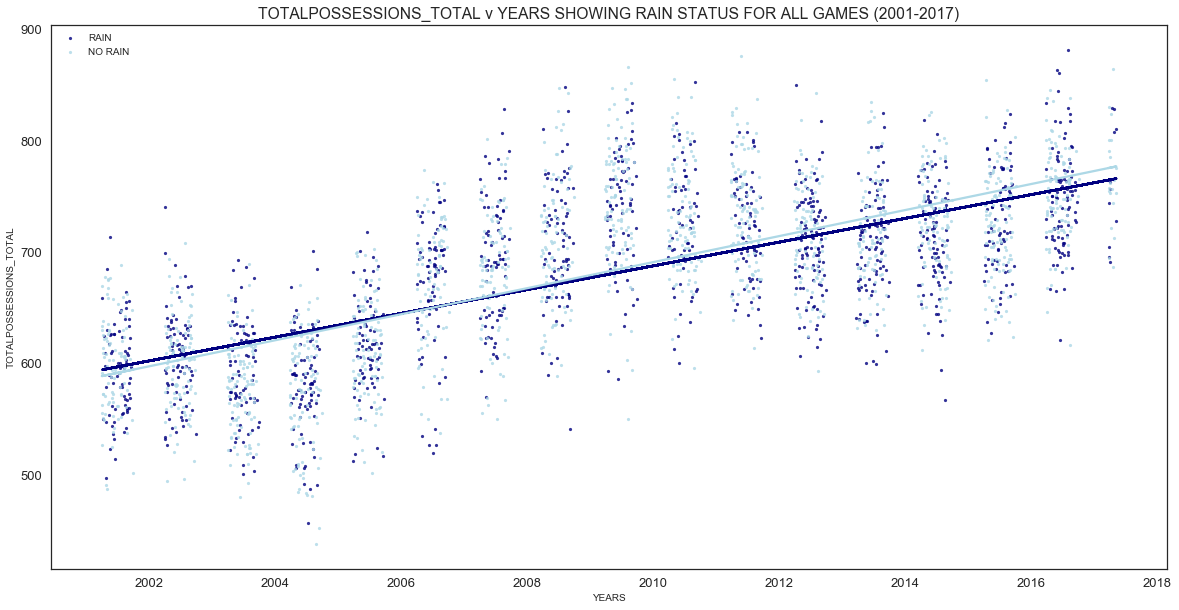

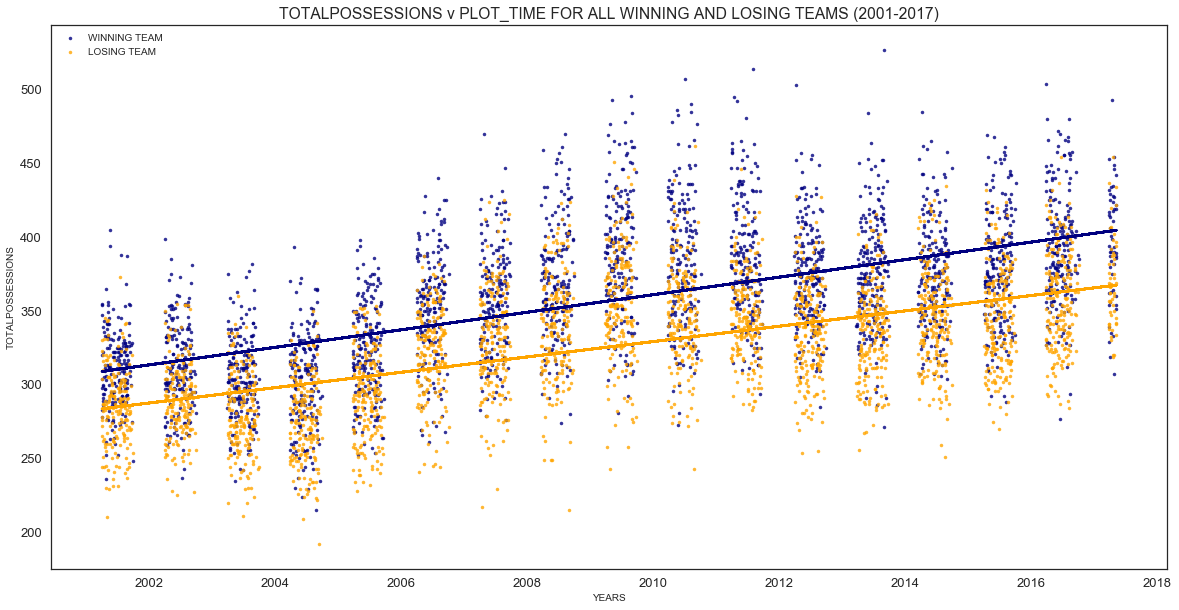

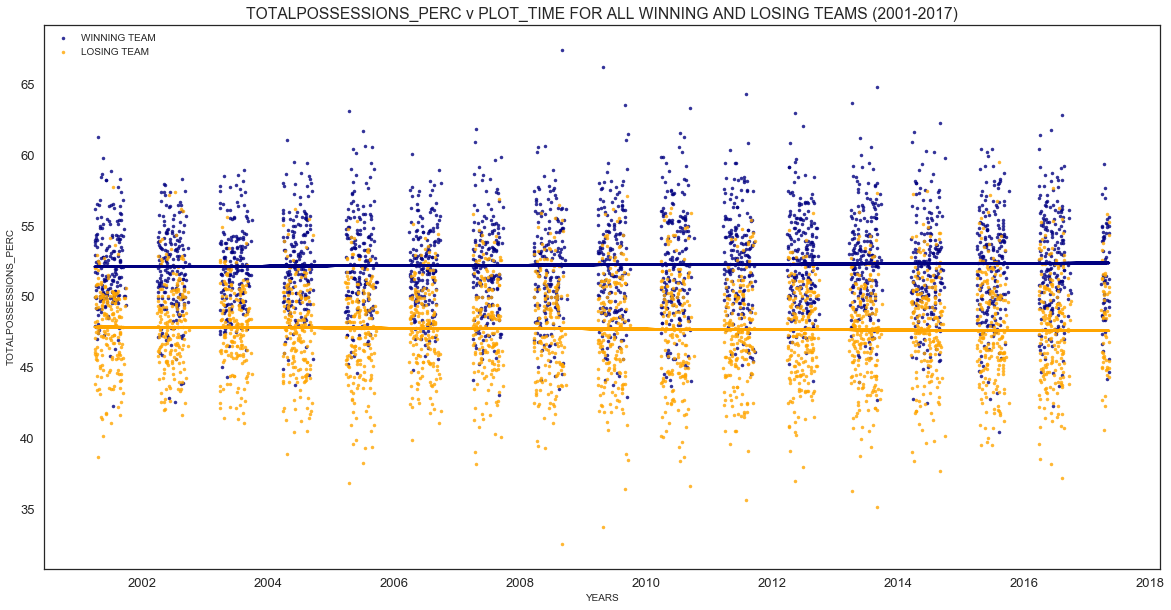

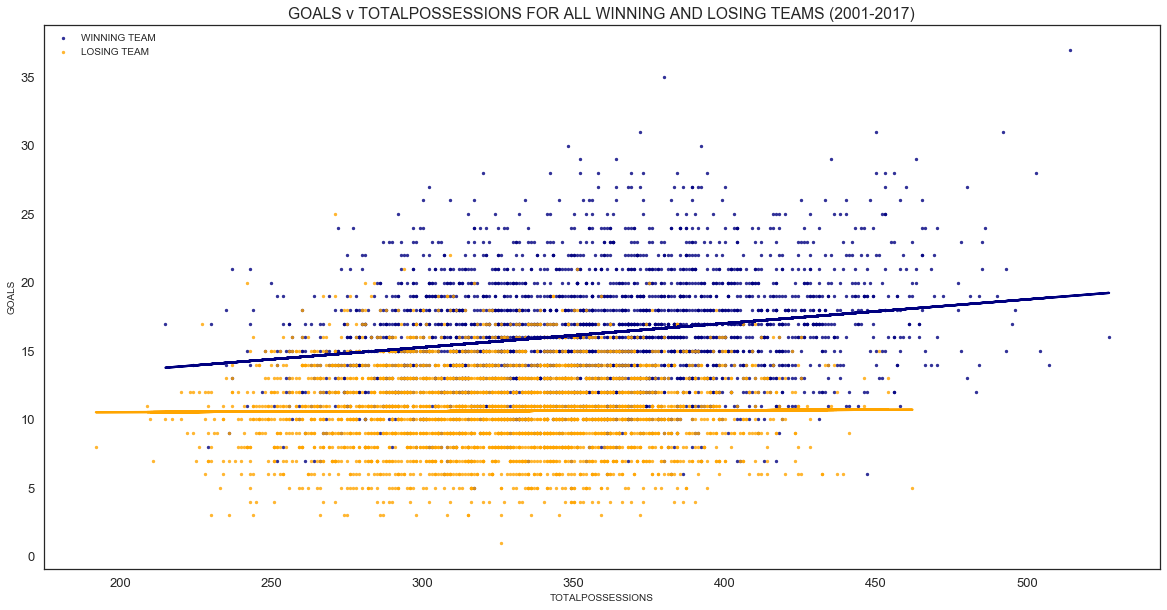

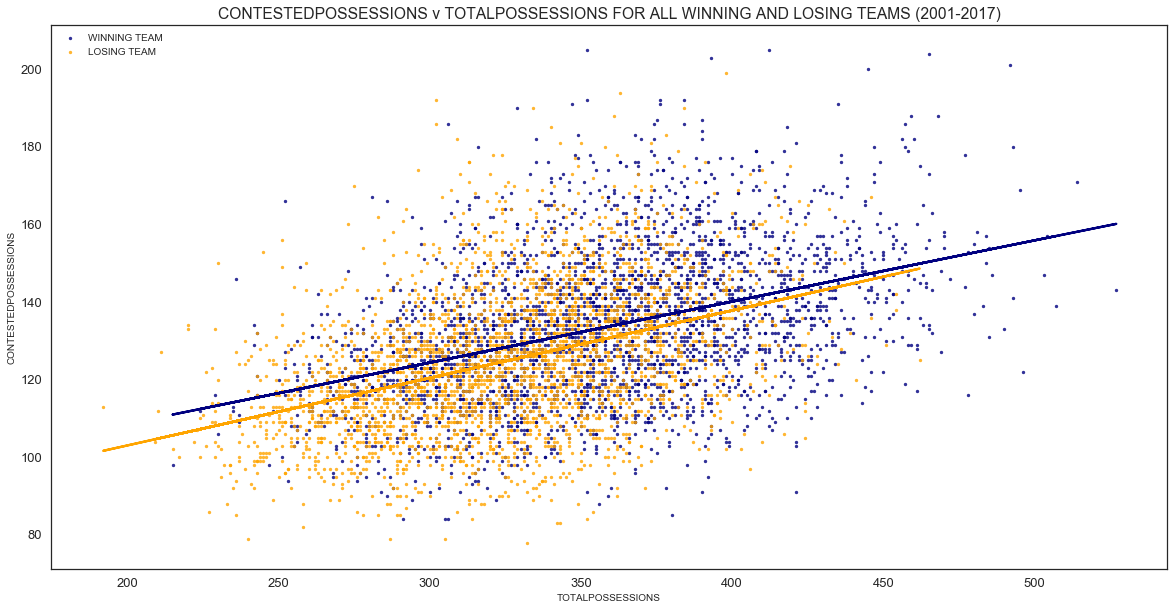

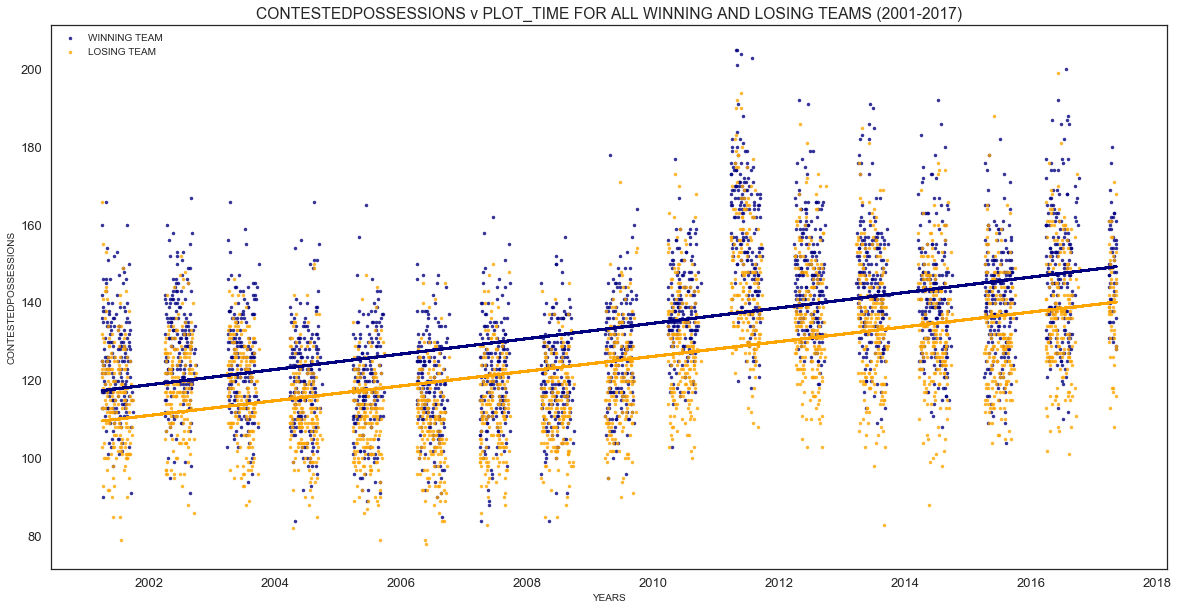

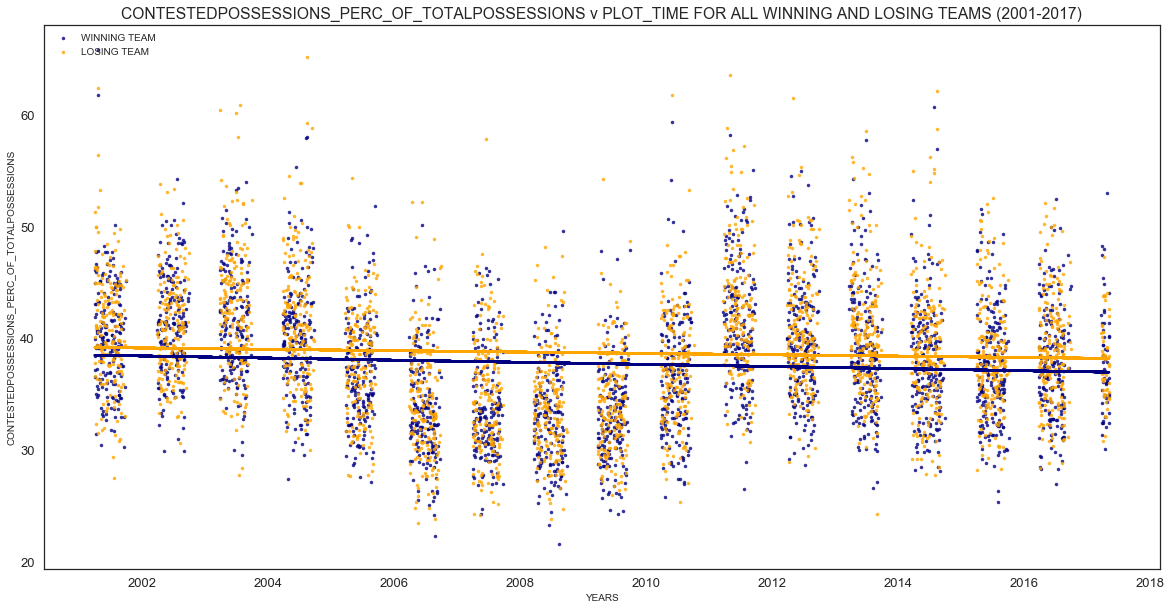

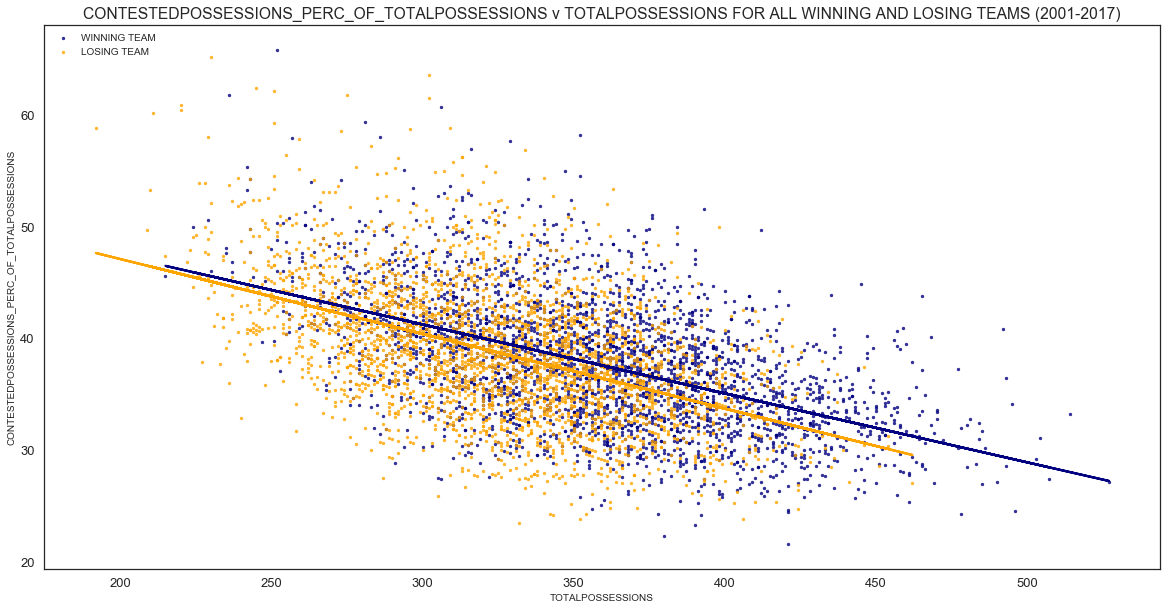

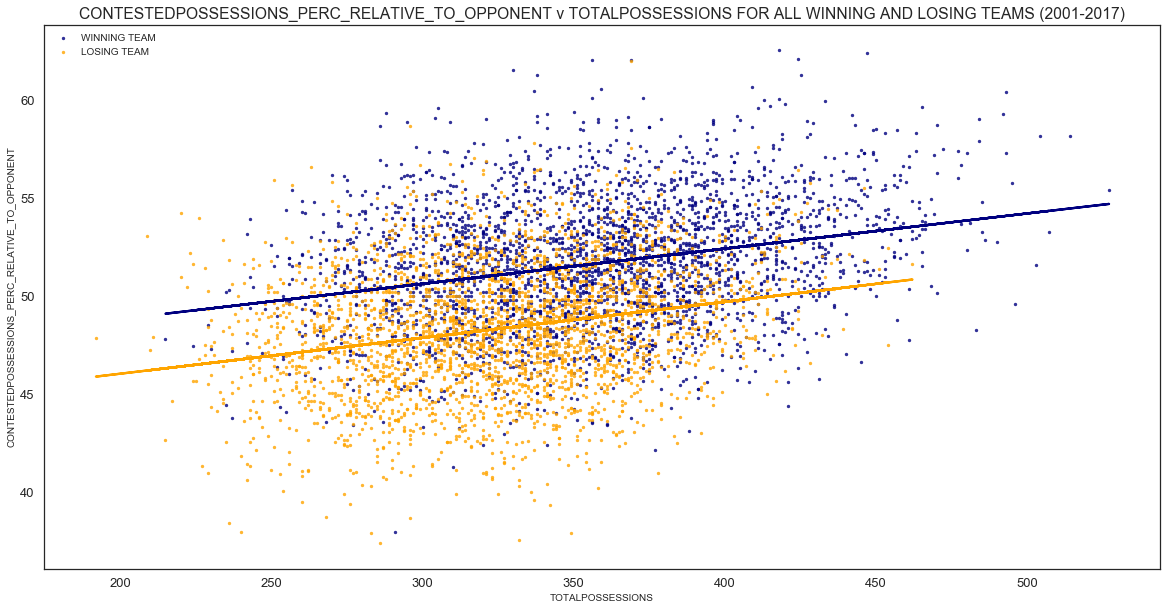

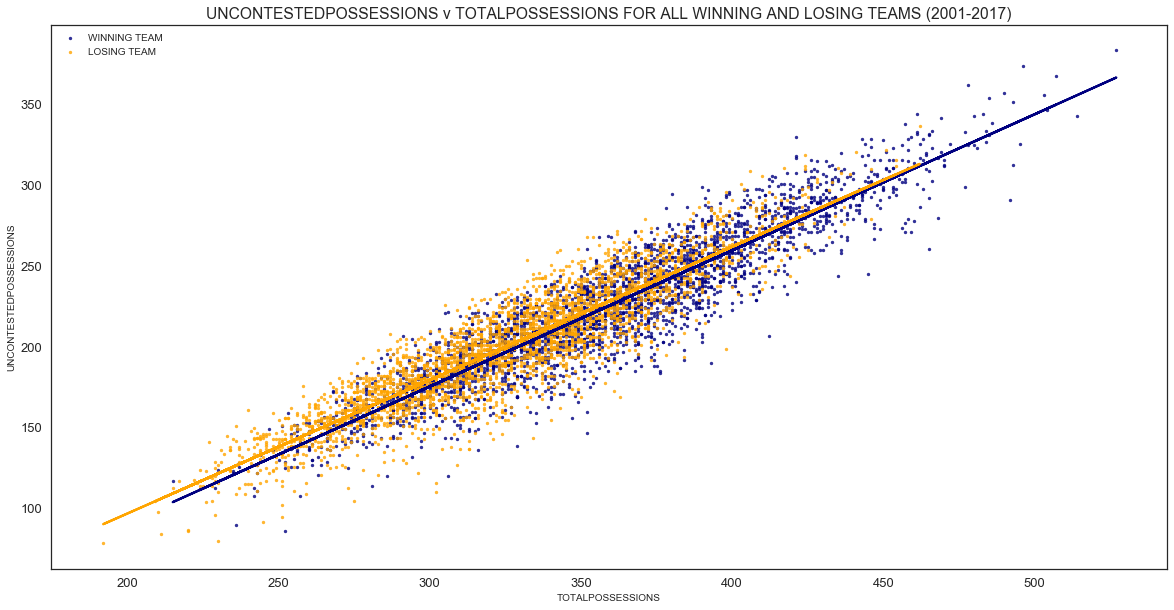

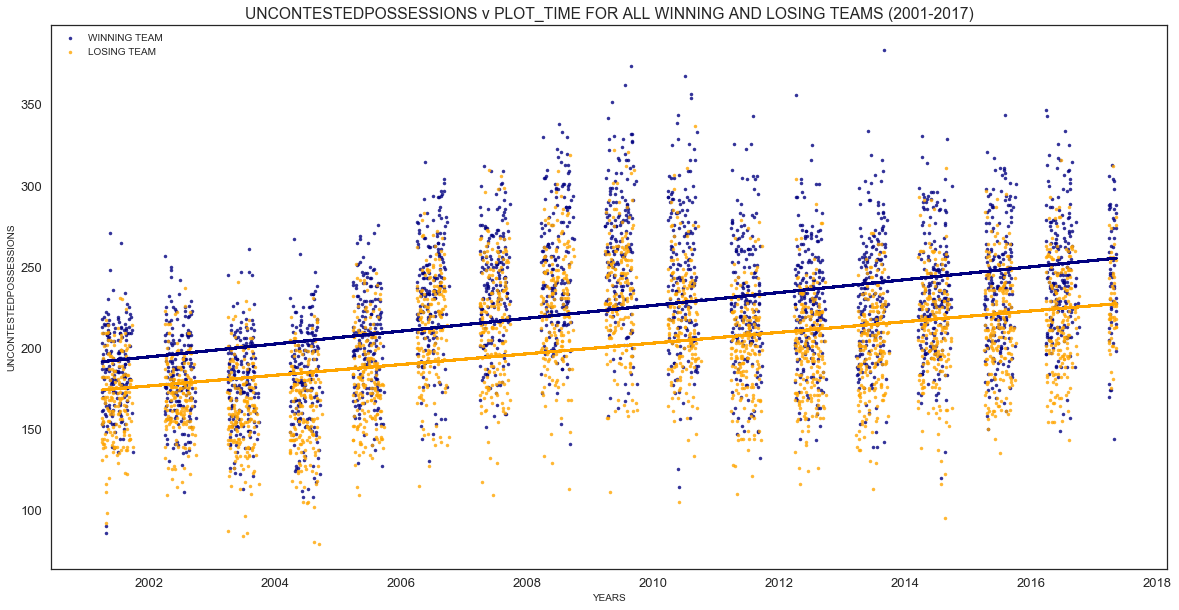

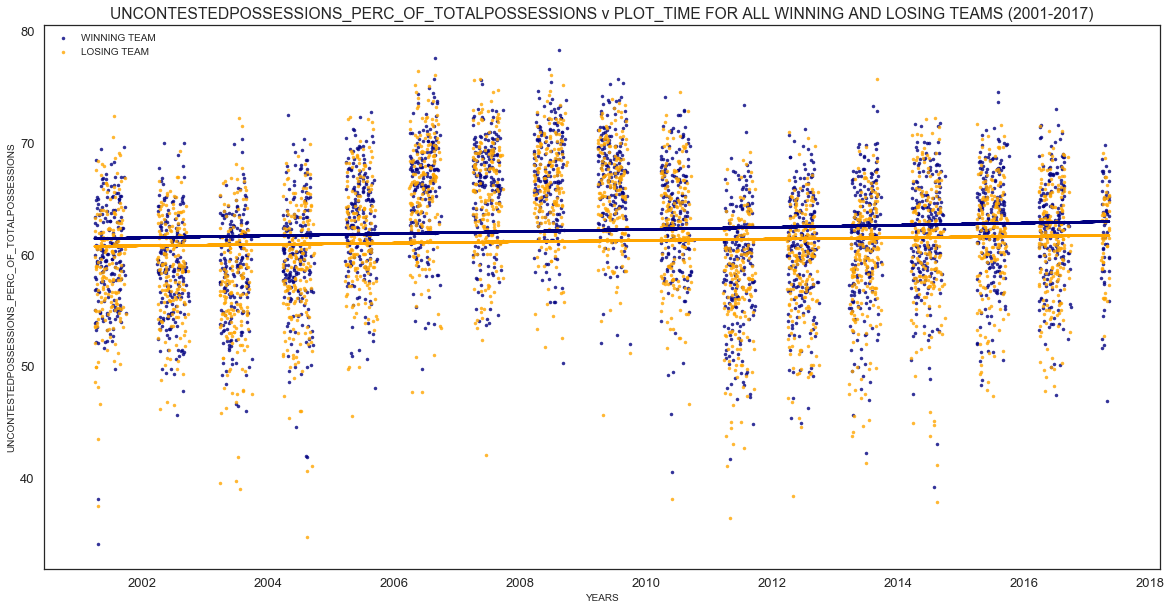

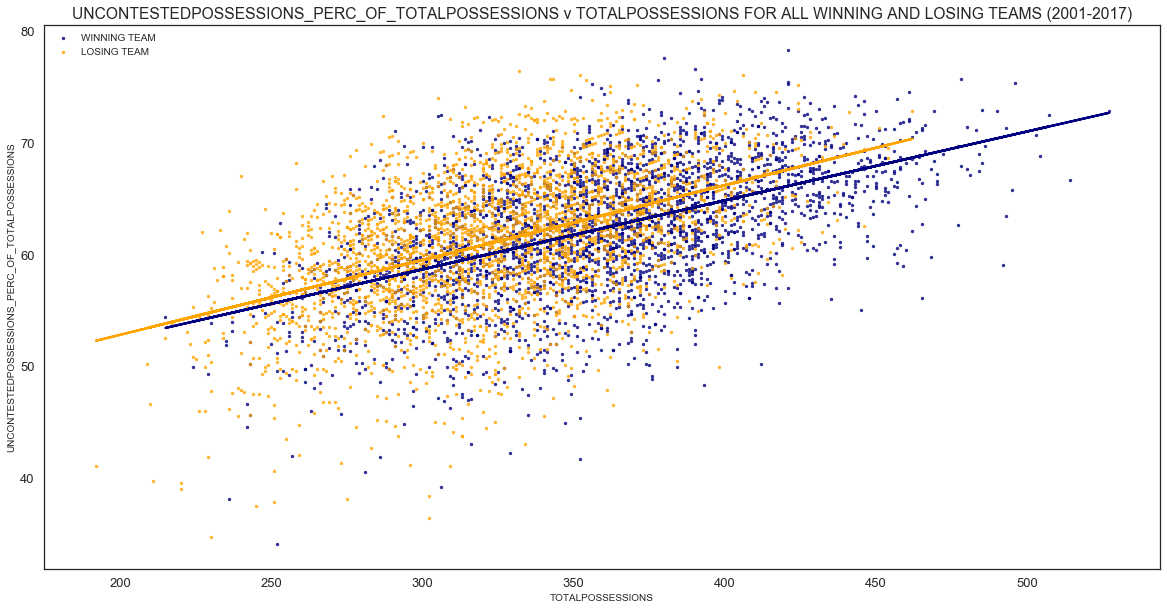

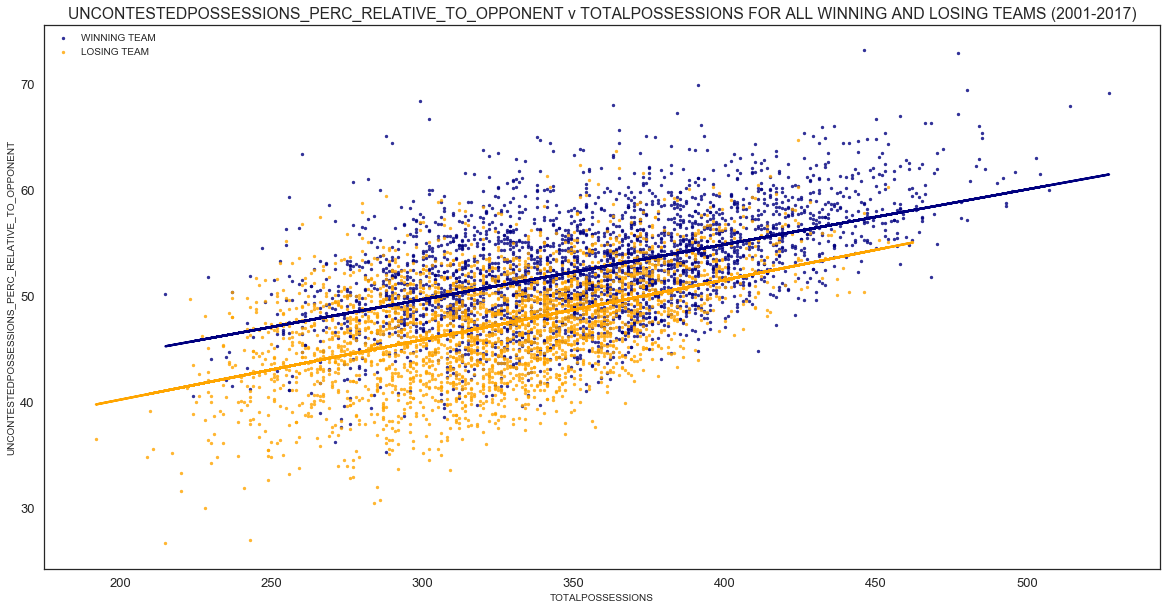

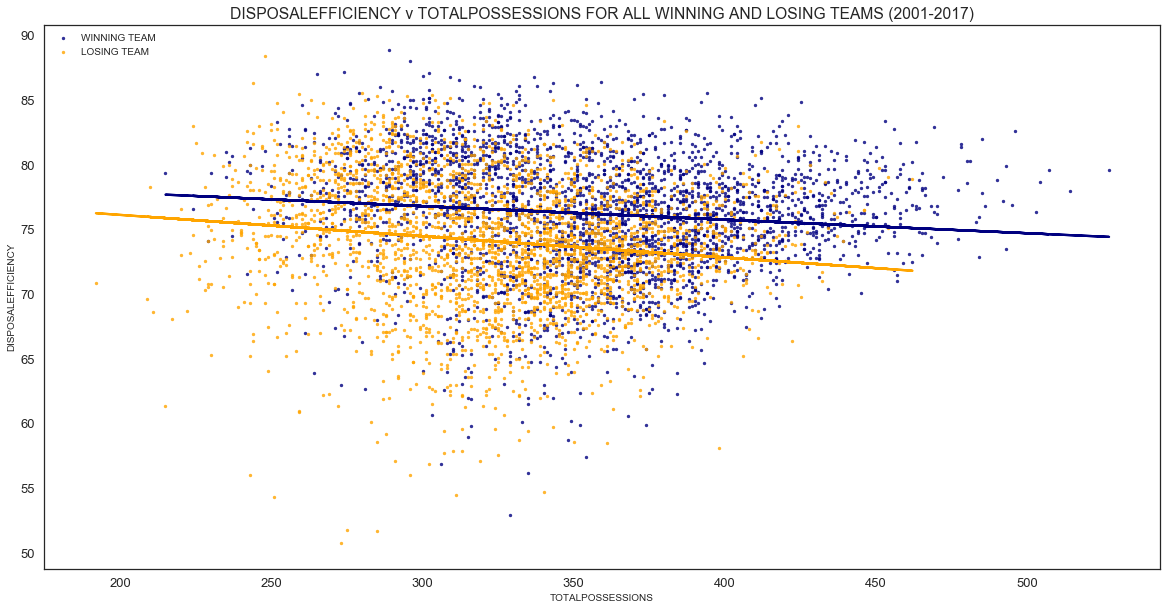

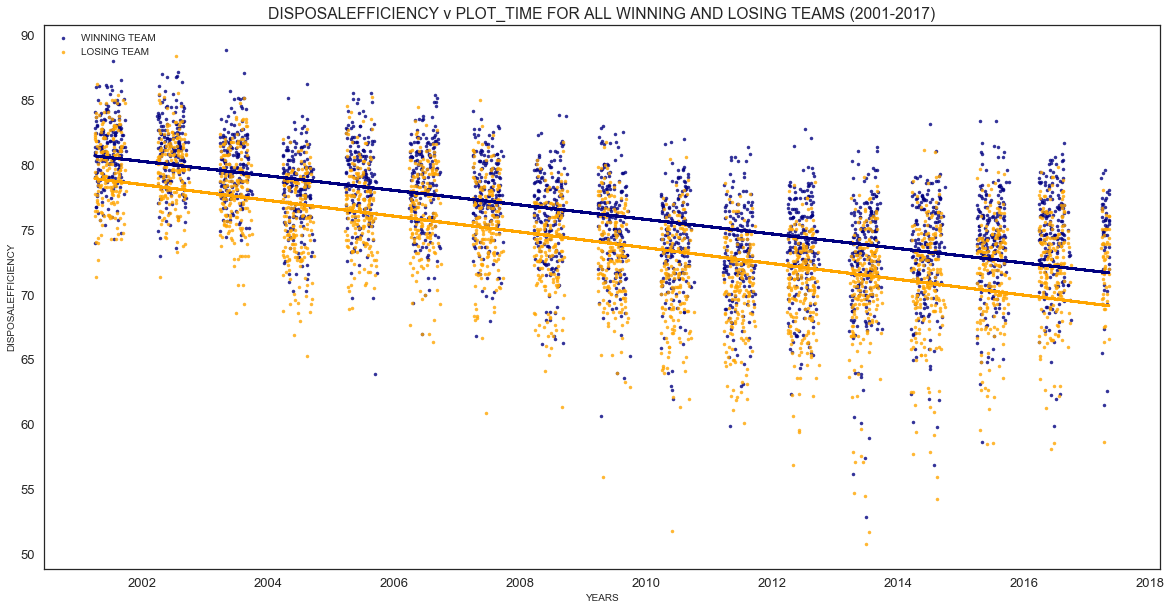

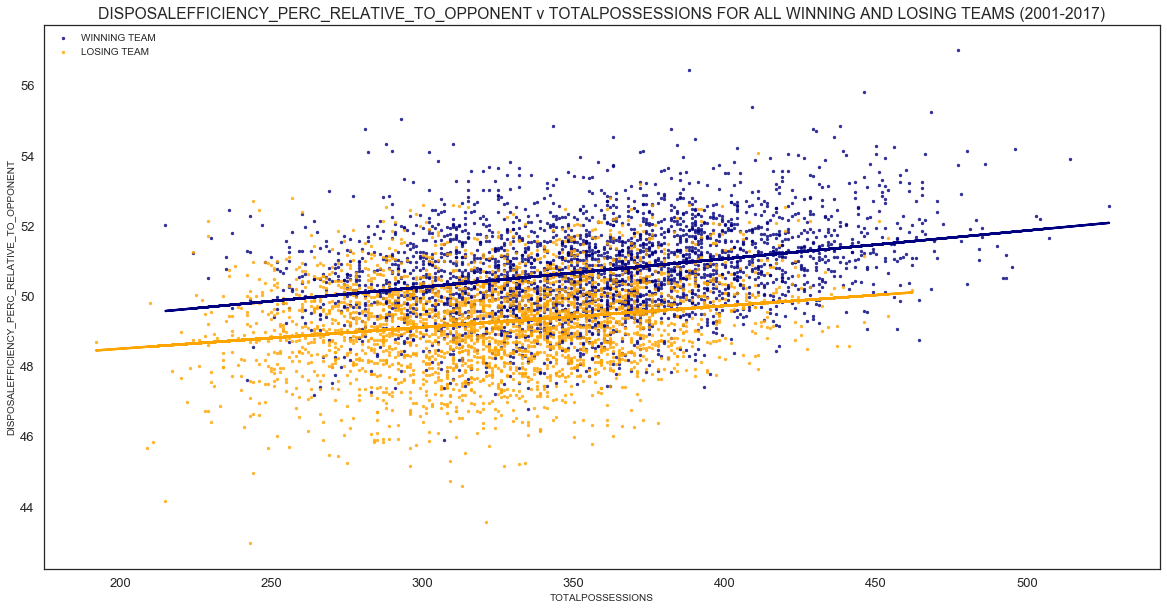

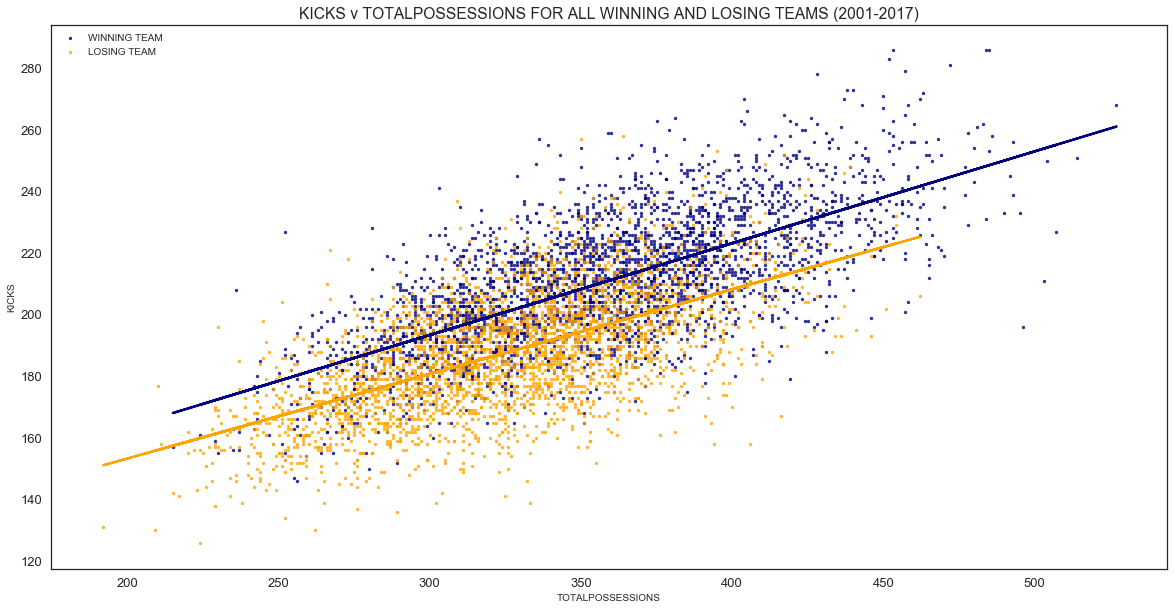

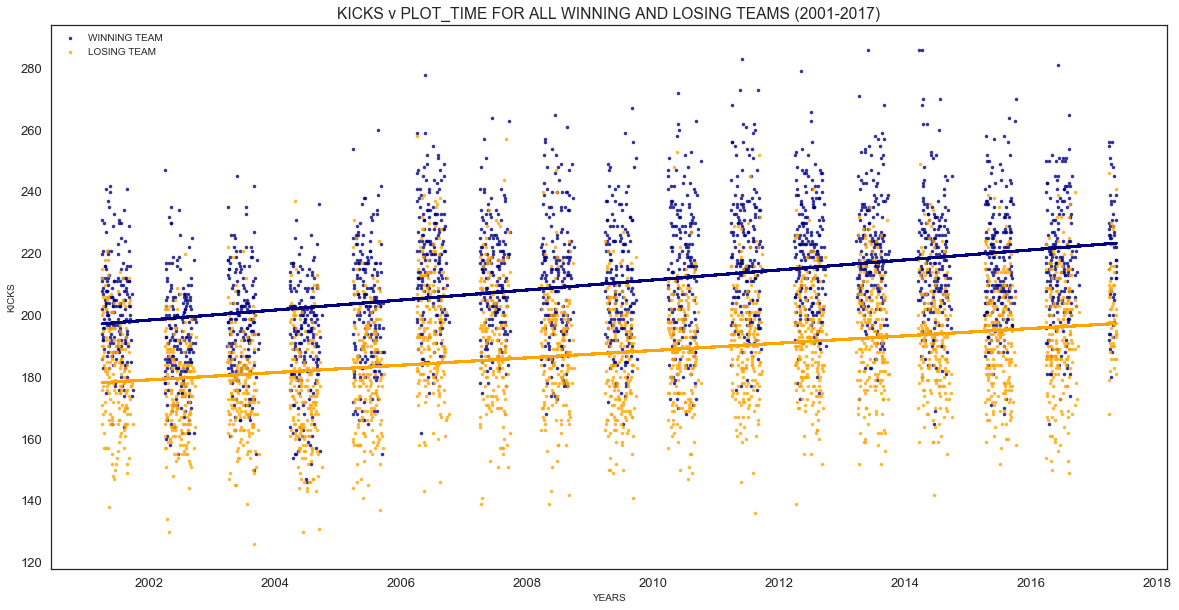

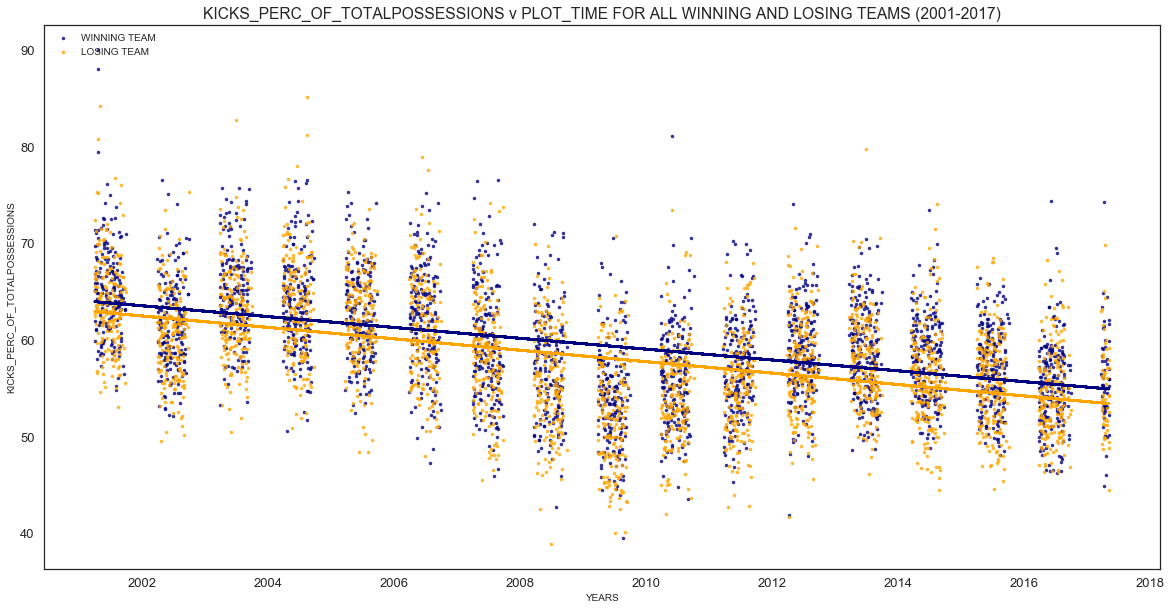

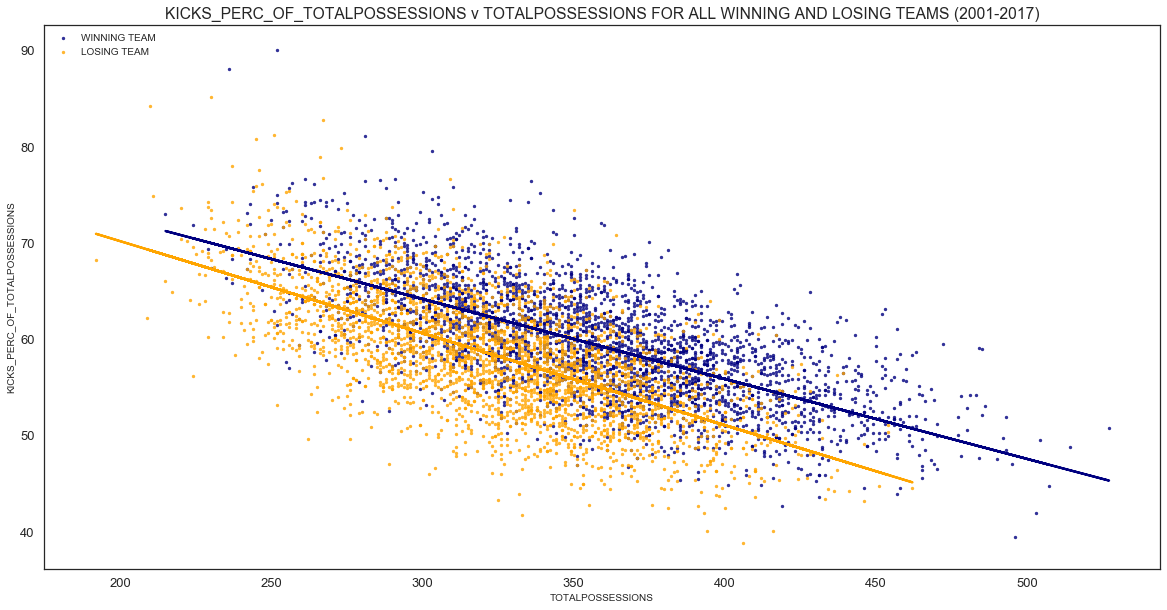

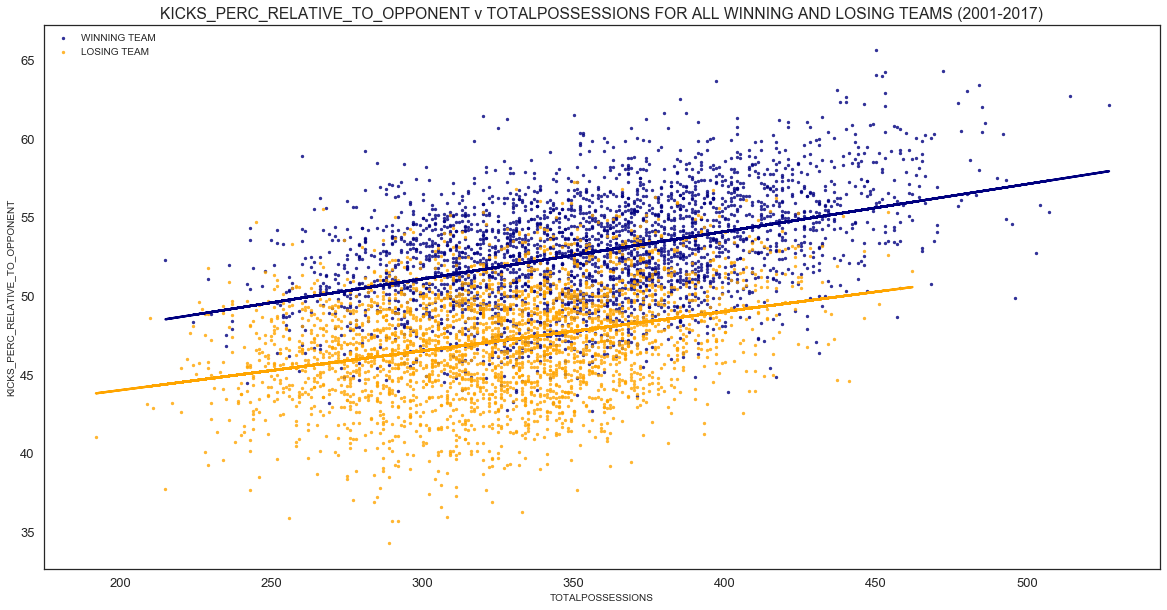

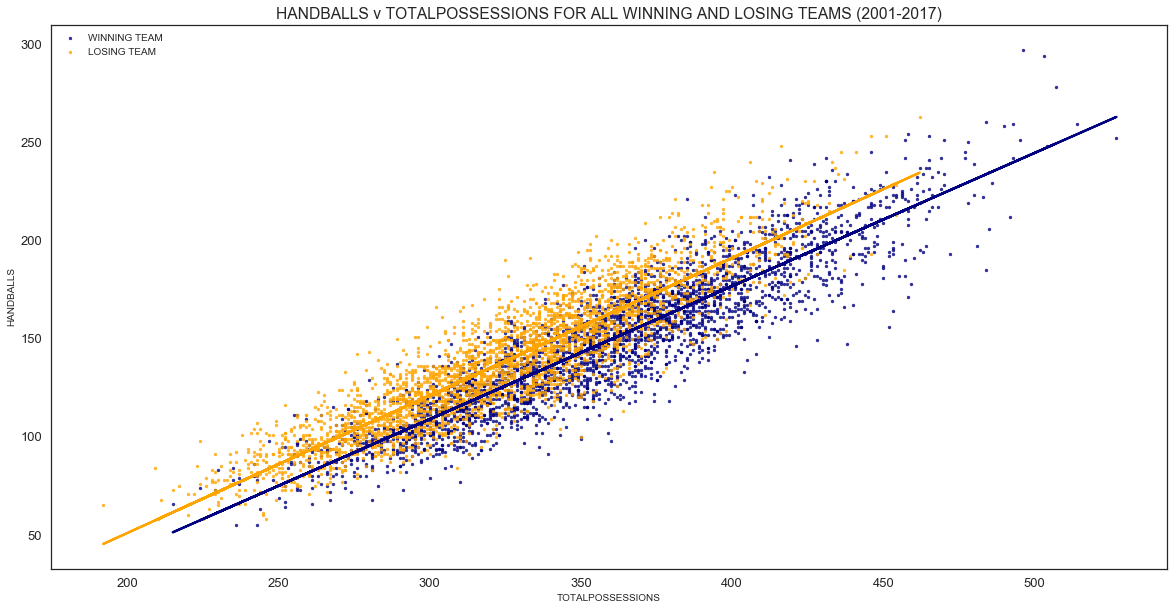

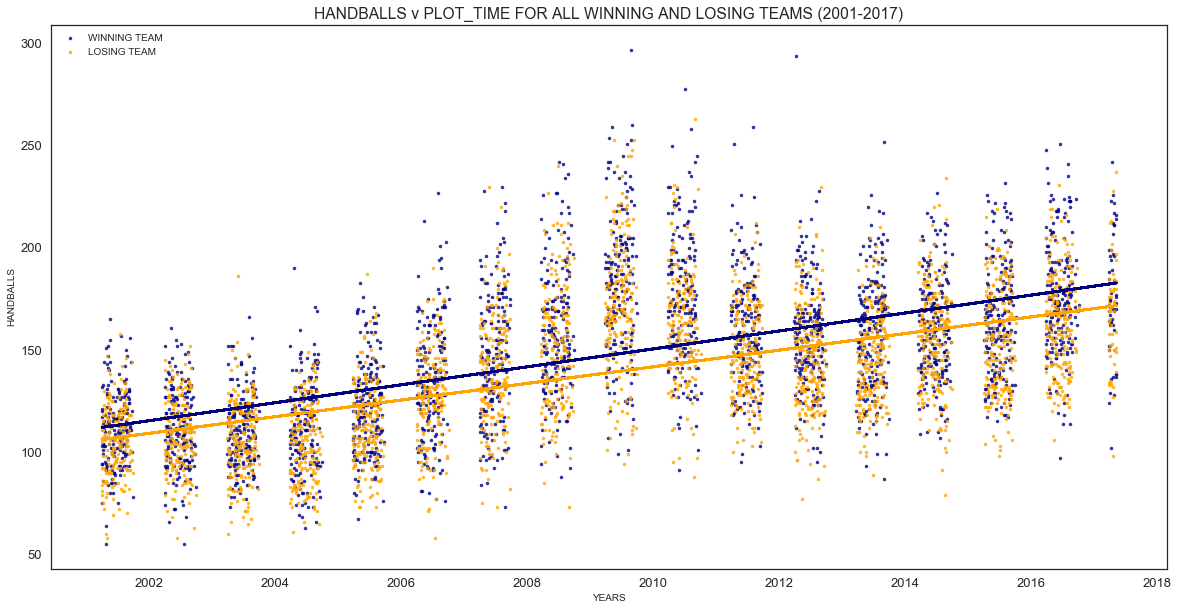

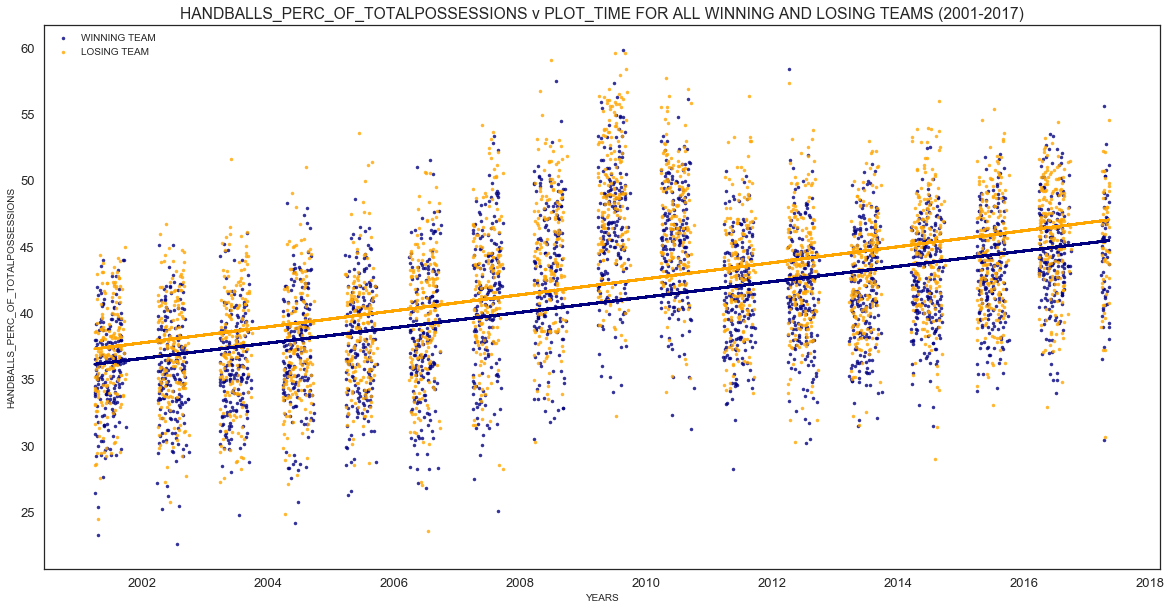

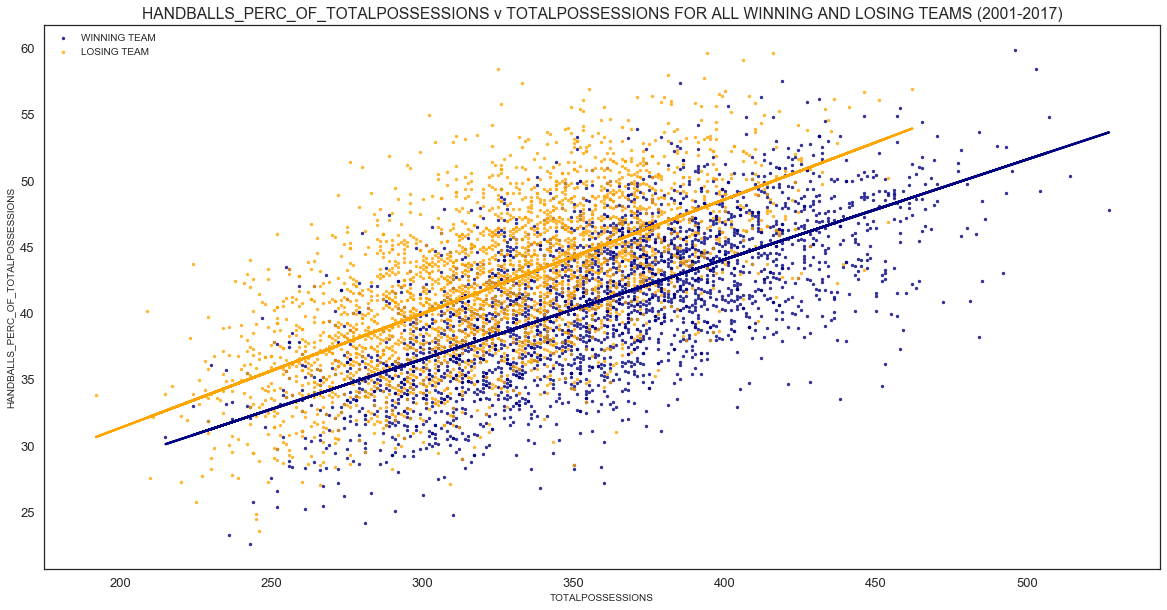

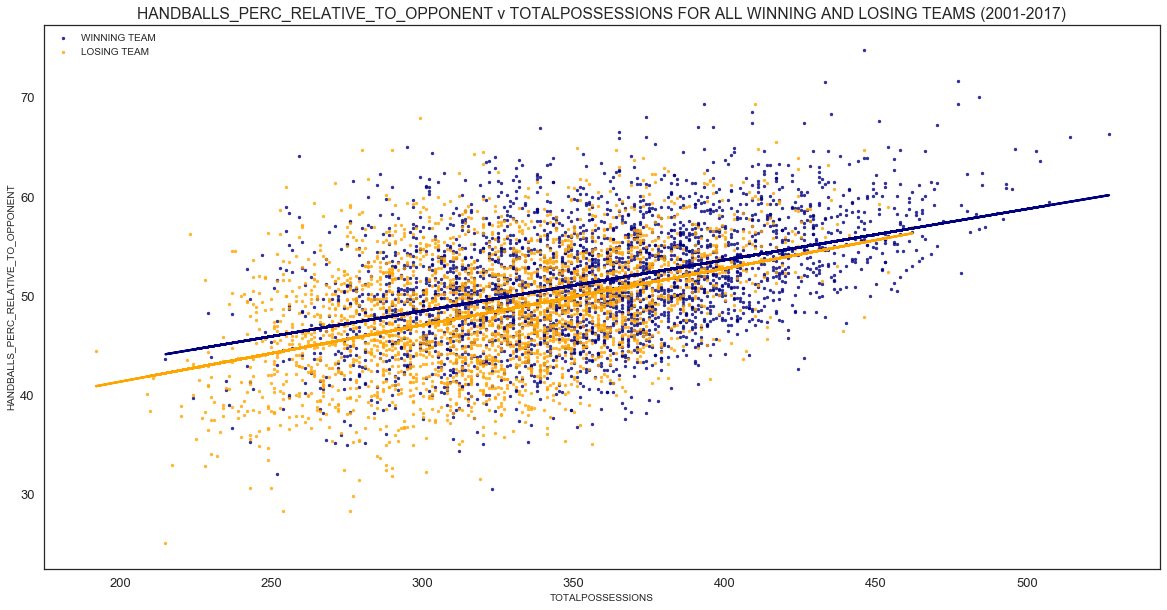

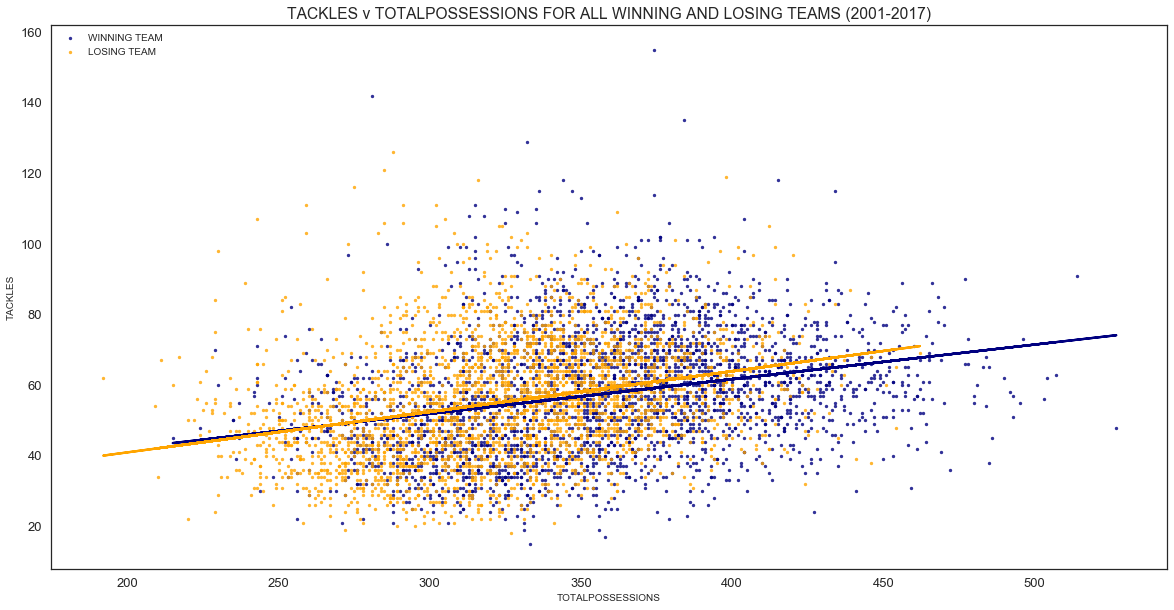

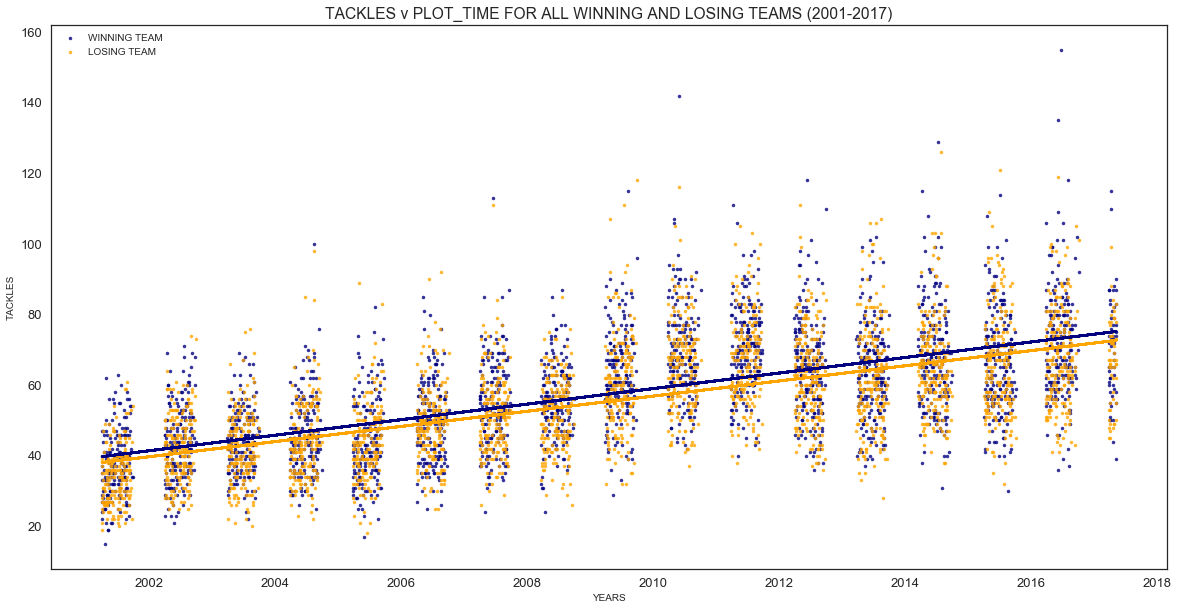

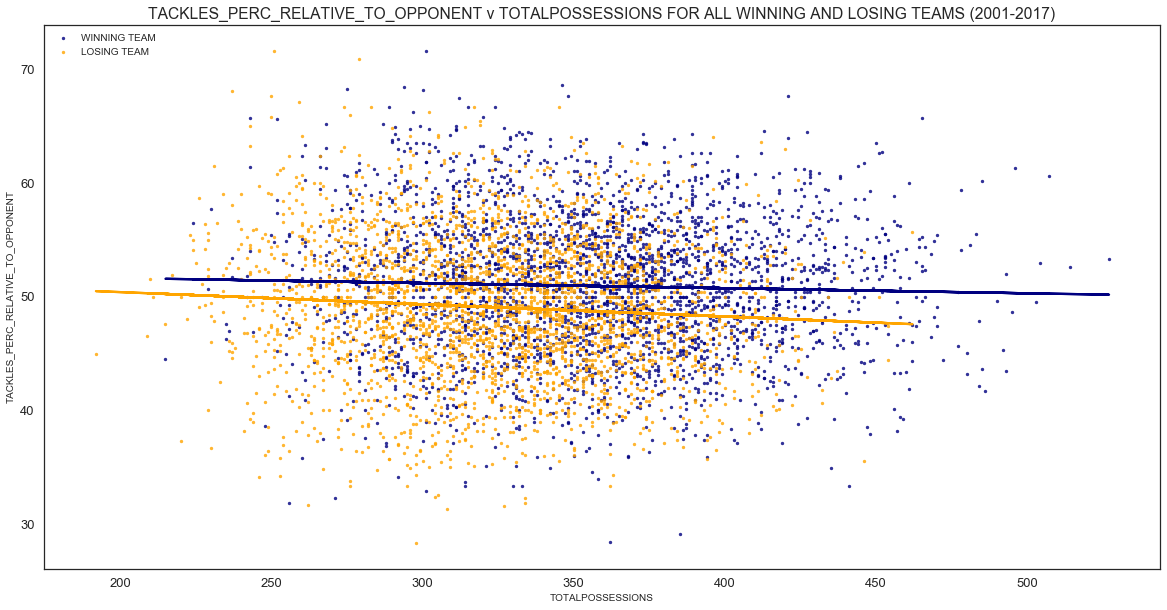

In [387]:
base_graphs (input_data, rain_data)

make_winloss(year, teamname, input_data, 'GOALS')

percentage_graphs5 ('CONTESTEDPOSSESSIONS')

percentage_graphs5 ('UNCONTESTEDPOSSESSIONS')
                   
percentage_graphs3 ('DISPOSALEFFICIENCY')
              
percentage_graphs5 ('KICKS')
              
percentage_graphs5 ('HANDBALLS')

percentage_graphs3 ('TACKLES')

### END